In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ex1/ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
X = data.iloc[:, :1]
X = (X - X.mean())/ X.std()
X.head()

,Population
0,-0.529654
1,-0.680150
2,0.092716
3,-0.298872
4,-0.594333


In [4]:
y = data.iloc[:, -1:]
y = (y - y.mean())/y.std()
y.head()

,Profit
0,2.132905
1,0.597261
2,1.419690
3,1.091575
4,0.178606


In [5]:
X = np.array(X)
X = np.hstack([np.ones([len(X), 1]), X])
y = np.array(y)
# theta = np.random.rand(1, 2)
theta = np.array([[0, 0]])

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

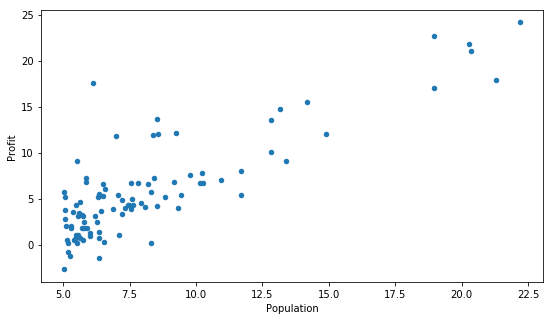

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(9, 5))

In [7]:
def Cost(X, y, theta):
    _sum = np.power((np.dot(X, theta.T) - y), 2)
    cost = _sum / 2*len(X)
    return cost

In [8]:
def GradientDescent(X, y, theta, alpha, epoch):
    temp = theta
    m = len(X)
    
    for i in range(epoch):
        temp = theta - (alpha/m)*np.dot((np.dot(X, theta.T) - y).T, X)
        theta = temp
        cost = Cost(X, y, theta)
        if i % 100 == 0:
            print('epoch:', i, 'theta:', theta[0])
    return theta

In [9]:
alpha = 0.03
epoch = 1000

In [10]:
theta = GradientDescent(X, y, theta, alpha, epoch)

epoch: 0 theta: [[1.06444063e-17 2.48770609e-02]]
epoch: 100 theta: [[7.30154768e-16 7.97960917e-01]]
epoch: 200 theta: [[8.32821784e-16 8.35913822e-01]]
epoch: 300 theta: [[8.34572961e-16 8.37777039e-01]]
epoch: 400 theta: [[8.30486882e-16 8.37868510e-01]]
epoch: 500 theta: [[8.36667505e-16 8.37873001e-01]]
epoch: 600 theta: [[8.34744645e-16 8.37873221e-01]]
epoch: 700 theta: [[8.33371173e-16 8.37873232e-01]]
epoch: 800 theta: [[8.32718774e-16 8.37873232e-01]]
epoch: 900 theta: [[8.33714541e-16 8.37873233e-01]]


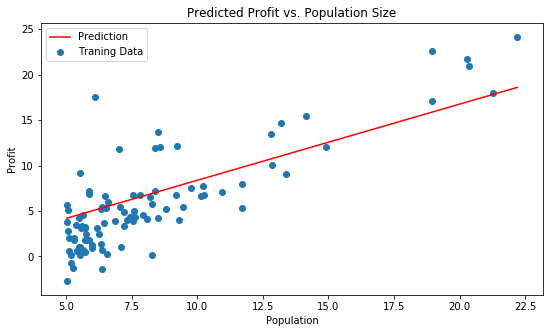

In [11]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0][0] + (theta[0][1]*x)
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Population'], data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# SKLEARN

In [12]:
data = pd.read_csv('./ex1/ex1data1.txt', header=None, names=['Population', 'Profit'])
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)

In [13]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

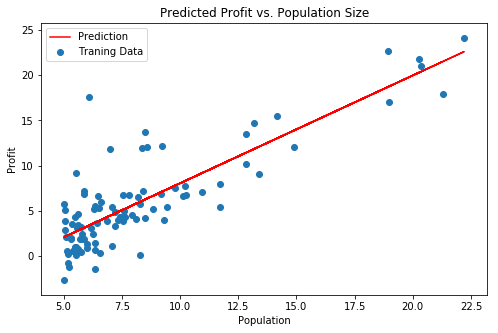

In [14]:
x = np.array(X[:, 0].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()